In [1]:
# import packages and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import git
import copy
from sklearn.cluster import k_means

In [2]:
# import needed data
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
datadir = f"{homedir}" + "/models/clustering/"

In [3]:
# load in csvs for each cluster desired into dataframes
DataBasic = pd.read_csv('data_basic.csv')
DataDemographics = pd.read_csv('data_demographics.csv')
DataGeography = pd.read_csv('data_geography.csv')
DataHealth = pd.read_csv('data_health.csv')
DataTotal = pd.read_csv('data.csv')

PCABasic = pd.read_csv('pca_basic.csv')
PCADemographics = pd.read_csv('pca_demographics.csv')
PCAGeography = pd.read_csv('pca_geography.csv')
PCAHealth = pd.read_csv('pca_health.csv')
PCATotal = pd.read_csv('pca_total.csv')

In [4]:
# create county index hashtable
IndexFips = {}
for row in DataBasic.iterrows():
    row = row[1]
    IndexFips[int(row[0])] = int(row[1])
#print(IndexFips)

In [5]:
# convert each dataframe into np array

# save the columns
BasicCols = []
DemographicsCols = []
GeographyCols = []
HealthCols = []
TotalCols = []

# Data Basic
DataBasic = DataBasic.drop(columns = ['Unnamed: 0', 'FIPS'])
BasicCols = DataBasic.columns
DataBasic = DataBasic.to_numpy()
PCABasic = PCABasic.drop(columns = ['Unnamed: 0', 'FIPS'])
PCABasic = PCABasic.to_numpy()

# Data Demographics
DataDemographics = DataDemographics.drop(columns = ['Unnamed: 0', 'FIPS'])
DemographicsCols = DataDemographics.columns
DataDemographics = DataDemographics.to_numpy()
PCADemographics = PCADemographics.drop(columns = ['Unnamed: 0', 'FIPS'])
PCADemographics = PCADemographics.to_numpy()

# Data Geography
DataGeography = DataGeography.drop(columns = ['Unnamed: 0', 'FIPS'])
GeographyCols = DataGeography.columns
DataGeography = DataGeography.to_numpy()
PCAGeography = PCAGeography.drop(columns = ['Unnamed: 0', 'FIPS'])
PCAGeography = PCAGeography.to_numpy()

# Data Health
DataHealth = DataHealth.drop(columns = ['Unnamed: 0', 'FIPS'])
HealthCols = DataHealth.columns
DataHealth = DataHealth.to_numpy()
PCAHealth = PCAHealth.drop(columns = ['Unnamed: 0', 'FIPS'])
PCAHealth = PCAHealth.to_numpy()

# Data Total
DataTotal = DataTotal.drop(columns = ['Unnamed: 0', 'FIPS'])
TotalCols = DataTotal.columns
DataTotal = DataTotal.to_numpy()
PCATotal = PCATotal.drop(columns = ['Unnamed: 0', 'FIPS'])
PCATotal = PCATotal.to_numpy()

In [6]:
# run k means clustering for each np array. Helper function

def cluster_data(data, min_k, max_k):
    errorBasic = []
    arrayBasic = []
    for j in range(min_k, max_k + 1):
        kmeansBasic = k_means(data, n_clusters=j, n_init=25)

        tempArray = []
        tempFips = []
        tempClusternum = []
        for i in range(0, len(kmeansBasic[1])):
            tempFips.append(IndexFips[i])
            tempClusternum.append(kmeansBasic[1][i])
        tempArray.append(tempFips)
        tempArray.append(tempClusternum)

        errorBasic.append(kmeansBasic[2])
        arrayBasic.append(tempArray)
    
    return (errorBasic, arrayBasic)

In [7]:
# plotting helper function

def plot_data(cluster, min_k, max_k, Factors):
    plt.plot([*range(min_k, max_k + 1)], cluster[0])
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.title('k vs Error: ' + Factors + ' factors') 

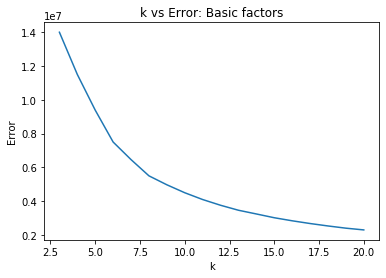

In [8]:
# get and plot Data Basic
clusterBasic = cluster_data(DataBasic, 3, 20)
plot_data(clusterBasic, 3, 20, 'Basic')

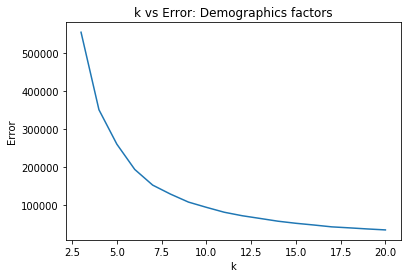

In [9]:
# get and plot Data Demographics
clusterDemographics = cluster_data(DataDemographics, 3, 20)
plot_data(clusterDemographics, 3, 20, 'Demographics')

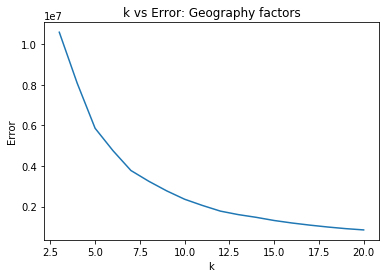

In [10]:
# get and plot Data Geography
clusterGeography = cluster_data(DataGeography, 3, 20)
plot_data(clusterGeography, 3, 20, 'Geography')

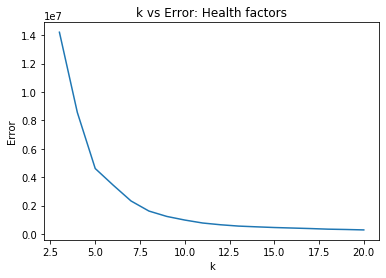

In [11]:
# get and plot Data Health
clusterHealth = cluster_data(DataHealth, 3, 20)
plot_data(clusterHealth, 3, 20, 'Health')

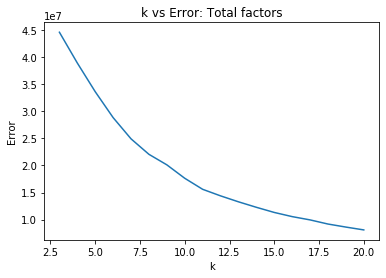

In [12]:
# get and plot Data Total
clusterTotal = cluster_data(DataTotal, 3, 20)
plot_data(clusterTotal, 3, 20, 'Total')

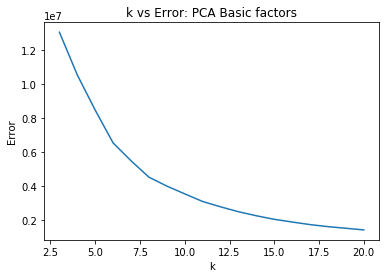

In [13]:
# get and plot PCA datasets
clusterPCABasic = cluster_data(PCABasic, 3, 20)
plot_data(clusterPCABasic, 3, 20, 'PCA Basic')

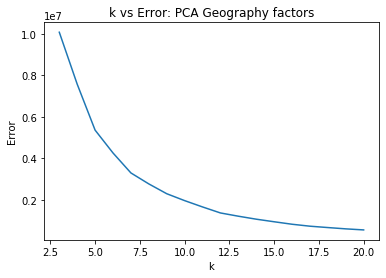

In [14]:
clusterPCAGeography = cluster_data(PCAGeography, 3, 20)
plot_data(clusterPCAGeography, 3, 20, 'PCA Geography')

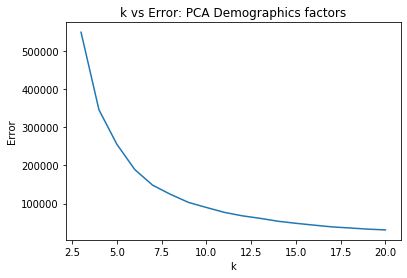

In [15]:
clusterPCADemographics = cluster_data(PCADemographics, 3, 20)
plot_data(clusterPCADemographics, 3, 20, 'PCA Demographics')

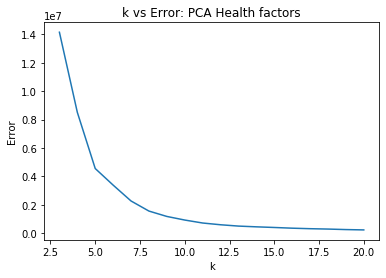

In [16]:
clusterPCAHealth = cluster_data(PCAHealth, 3, 20)
plot_data(clusterPCAHealth, 3, 20, 'PCA Health')

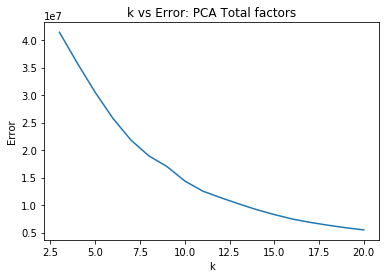

In [17]:
clusterPCATotal = cluster_data(PCATotal, 3, 20)
plot_data(clusterPCATotal, 3, 20, 'PCA Total')

In [18]:
# helper function to write to CSV, many clusters here

def Data_ToCSV(k, clustering, Format):
    clustering = clustering[1][k - 3]
    clustering = np.array(clustering).T.tolist()
    clustering = pd.DataFrame(clustering)
    clustering.columns = ['FIPS', 'Cluster']
    clustering = clustering.set_index('FIPS')
    clustering.to_csv('clustering%d_%s.csv' % (k, Format))

In [19]:
# write particular values of k from elbow method and use them to get CSVs

Data_ToCSV(9, clusterBasic, 'basic')
Data_ToCSV(7, clusterDemographics, 'demographics')
Data_ToCSV(8, clusterGeography, 'geography')
Data_ToCSV(8, clusterHealth, 'health')
Data_ToCSV(12, clusterTotal, 'total')

In [20]:
# do the same for the clustering based on the PCA data

Data_ToCSV(9, clusterPCABasic, 'pca_basic')
Data_ToCSV(7, clusterPCADemographics, 'pca_demographics')
Data_ToCSV(8, clusterPCAGeography, 'pca_geography')
Data_ToCSV(8, clusterPCAHealth, 'pca_health')
Data_ToCSV(12, clusterPCATotal, 'pca_total')

In [21]:
# trying higher values of k

Data_ToCSV(20, clusterBasic, 'basic')
Data_ToCSV(20, clusterDemographics, 'demographics')
Data_ToCSV(20, clusterGeography, 'geography')
Data_ToCSV(20, clusterHealth, 'health')
Data_ToCSV(20, clusterTotal, 'total')
Data_ToCSV(20, clusterPCABasic, 'pca_basic')
Data_ToCSV(20, clusterPCADemographics, 'pca_demographics')
Data_ToCSV(20, clusterPCAGeography, 'pca_geography')
Data_ToCSV(20, clusterPCAHealth, 'pca_health')
Data_ToCSV(20, clusterPCATotal, 'pca_total')

In [22]:
# compare errors

def plot_compare(cluster1, cluster2, min_k, max_k, Factors):
    ratios = []
    for i in range(0, len(cluster1[0])):
        ratios.append(cluster1[0][i]/cluster2[0][i])
    plt.plot([*range(min_k, max_k + 1)], ratios)
    plt.xlabel('k')
    plt.ylabel('Regular vs PCA Error Ratio')
    plt.title('k vs Error Ratio: ' + Factors + ' factors') 

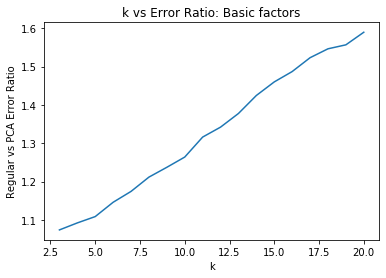

In [23]:
plot_compare(clusterBasic, clusterPCABasic, 3, 20, 'Basic')

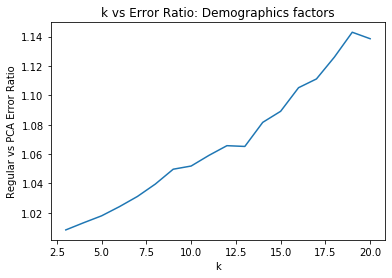

In [24]:
plot_compare(clusterDemographics, clusterPCADemographics, 3, 20, 'Demographics')

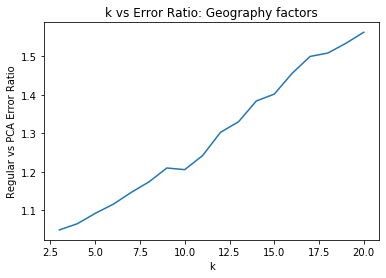

In [25]:
plot_compare(clusterGeography, clusterPCAGeography, 3, 20, 'Geography')

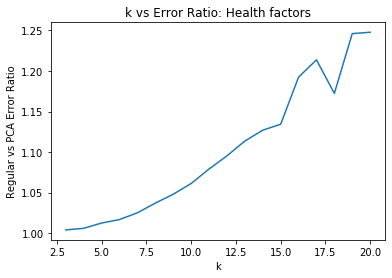

In [26]:
plot_compare(clusterHealth, clusterPCAHealth, 3, 20, 'Health')

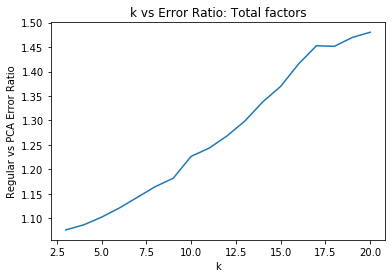

In [27]:
plot_compare(clusterTotal, clusterPCATotal, 3, 20, 'Total')

In [28]:
# Random shuffling helper function

def random_shuffle(data, k):
    errors = []
    clusterings = []
    for i in range(0, len(data[0])):
        data1 = copy.deepcopy(data)
        perm = np.random.permutation(len(data1))
        original_list = []
        for j in range(0, len(data1)):
            original_list.append(data1[j][i])
        for j in range(0, len(data1)):
            data1[j][i] = original_list[perm[i]]
            
        new_cluster = k_means(data1, n_clusters=k, n_init=25)
        errors.append(new_cluster[2])
        
        tempArray = []
        tempFips = []
        tempClusternum = []
        for i in range(0, len(new_cluster[1])):
            tempFips.append(IndexFips[i])
            tempClusternum.append(new_cluster[1][i])
        tempArray.append(tempFips)
        tempArray.append(tempClusternum)
        clusterings.append(tempArray)
        
    return (errors, clusterings)

In [29]:
def analyze_shuffle(data, k, original, cols):
    shuffle = random_shuffle(data, k)
    print(original[0][k - 3])
    analyze_list = []
    for i in range(0, len(shuffle[0])):
        analyze_list.append((cols[i], shuffle[0][i], shuffle[0][i] / original[0][k - 3]))
    print(analyze_list)

In [30]:
# Random shuffling

analyze_shuffle(DataBasic, 9, clusterBasic, BasicCols)
analyze_shuffle(DataDemographics, 7, clusterDemographics, DemographicsCols)
analyze_shuffle(DataGeography, 8, clusterGeography, GeographyCols)
analyze_shuffle(DataHealth, 8, clusterHealth, HealthCols)
analyze_shuffle(DataTotal, 12, clusterTotal, TotalCols)

4968353.219447628
[('Pop', 2277500.578892615, 0.4584015021270616), ('Density', 3389294.1283309744, 0.6821765640704165), ('UrbanRural', 4959492.924354833, 0.9982166535466696), ('EconType', 4950851.974562386, 0.9964774555849337), ('Policies', 4404906.057511119, 0.8865927728867974), ('Movement', 1729790.3625378292, 0.3481617119666351), ('Transit', 4600441.676977041, 0.9259489963333384)]
152685.84848728386
[('65+', 27598.766421490567, 0.18075523498033333), ('Male', 152620.84288865054, 0.9995742526286663), ('AfricanAmer', 20244.707730733997, 0.13259059651765984), ('CollegePlus', 152284.7294024157, 0.9973729124942343), ('Income', 152068.0241807924, 0.9959536243036765), ('Unemployed', 151432.13273426425, 0.9917889197627636), ('Dems', 150633.62024764164, 0.9865591457232322)]
3248287.319179284
[('Pop', 1014392.1925472275, 0.31228524230532817), ('Density', 1698811.4522276092, 0.5229868189913794), ('Area', 1733744.3048434583, 0.533741056281163), ('UrbanRural', 3238214.7343344227, 0.99689910902111

In [31]:
def convert_cluster_shuffledata(data, cols, to_drop, data_type):
    shuffle = pd.DataFrame(data)
    shuffle.columns = cols
    shuffle = shuffle.drop(columns = to_drop)
    shuffle = shuffle.to_numpy()
    
    cluster = cluster_data(shuffle, 3, 20)
    plot_data(cluster, 3, 20, data_type)
    
    return cluster

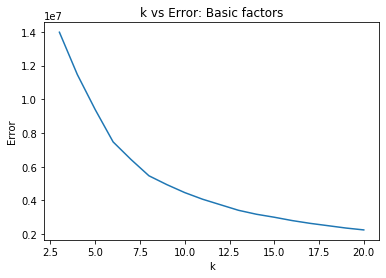

In [32]:
shuffle_basic = convert_cluster_shuffledata(DataBasic, BasicCols, ['UrbanRural', 'EconType'], 'Basic')

([551013.9422344884,
  347495.9036960942,
  257093.49353784713,
  190935.32139041467,
  149625.83338140743,
  125513.32776741116,
  106230.23298866005,
  91191.24709426446,
  77738.17464361162,
  69657.04211668432,
  61971.41882228582,
  55027.4274294126,
  49649.657608222224,
  44758.85623305243,
  40240.60251012787,
  36911.93156114536,
  34493.387328496436,
  32404.539208192895],
 [[[1001,
    1003,
    1005,
    1007,
    1009,
    1011,
    1013,
    1015,
    1017,
    1019,
    1021,
    1023,
    1025,
    1027,
    1029,
    1031,
    1033,
    1035,
    1037,
    1039,
    1041,
    1043,
    1045,
    1047,
    1049,
    1051,
    1053,
    1055,
    1057,
    1059,
    1061,
    1063,
    1065,
    1067,
    1069,
    1071,
    1073,
    1075,
    1077,
    1079,
    1081,
    1083,
    1085,
    1087,
    1089,
    1091,
    1093,
    1095,
    1097,
    1099,
    1101,
    1103,
    1105,
    1107,
    1109,
    1111,
    1113,
    1115,
    1117,
    1119,
    1121,
    

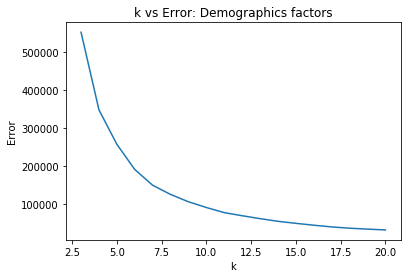

In [33]:
convert_cluster_shuffledata(DataDemographics, DemographicsCols, ['CollegePlus', 'Income', 'Dems'], 'Demographics')

([551013.9422344884,
  347495.9036960942,
  257097.83436271155,
  190720.4497907242,
  149608.83748746436,
  125769.48623591044,
  105041.32800223702,
  90907.48226429182,
  77951.8984497578,
  69099.67327203583,
  62767.258464045604,
  55529.55372257845,
  50018.9418104796,
  45075.8221133256,
  40150.178607720605,
  37339.625098438424,
  34861.216075701304,
  32650.415690237365],
 [[[1001,
    1003,
    1005,
    1007,
    1009,
    1011,
    1013,
    1015,
    1017,
    1019,
    1021,
    1023,
    1025,
    1027,
    1029,
    1031,
    1033,
    1035,
    1037,
    1039,
    1041,
    1043,
    1045,
    1047,
    1049,
    1051,
    1053,
    1055,
    1057,
    1059,
    1061,
    1063,
    1065,
    1067,
    1069,
    1071,
    1073,
    1075,
    1077,
    1079,
    1081,
    1083,
    1085,
    1087,
    1089,
    1091,
    1093,
    1095,
    1097,
    1099,
    1101,
    1103,
    1105,
    1107,
    1109,
    1111,
    1113,
    1115,
    1117,
    1119,
    1121,
    1

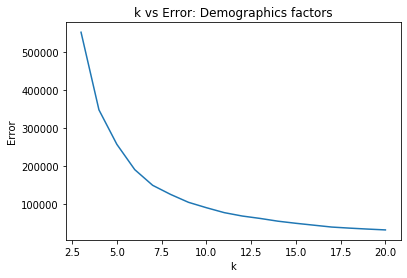

In [34]:
convert_cluster_shuffledata(DataDemographics, DemographicsCols, ['CollegePlus', 'Income', 'Dems'], 'Demographics')